# Week 3: Classification



In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer

%matplotlib inline

In [36]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Data preaparation

In [37]:
# Replace missing values with 0's
df.fillna("0", inplace=True)

# New columns creation and cast to int
df['total_bedrooms'] = df['total_bedrooms'].astype(float)
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,532.476211,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.210902,3.070655
std,2.003532,2.135952,12.585558,2181.615252,422.678333,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.061473,10.386050
min,-124.350000,32.540000,1.000000,2.000000,0.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.000000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.174539,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.202626,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239273,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


### Make `median_house_value` binary

* We need to turn the `median_house_value` variable from numeric into binary.
* Let's create a variable `above_average` which is `1` if the `median_house_value` is above its mean value and `0` otherwise.

In [38]:
mean_median_house_value = round(df['median_house_value'].mean(), 2)

def above_avg_calc(row):
    if row['median_house_value'] > mean_median_house_value:
        return 1
    else:
        return 0


df['median_house_value_binary'] = df.apply(lambda row: above_avg_calc(row), axis = 1)
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,median_house_value_binary
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,532.476211,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.210902,3.070655,0.406250
std,2.003532,2.135952,12.585558,2181.615252,422.678333,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.061473,10.386050,0.491144
min,-124.350000,32.540000,1.000000,2.000000,0.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.000000,0.692308,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.174539,2.429741,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.202626,2.818116,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239273,3.282261,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333,1.000000


### Question 1

What is the most frequent observation (mode) for the column `ocean_proximity`?

Options:
* `NEAR BAY`
* `<1H OCEAN` ✅
* `INLAND`
* `NEAR OCEAN`

In [39]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## Split the data / Validation framework

* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.
* Make sure that the target value (`median_house_value`) is not in your dataframe.

In [40]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

len(df_train), len(df_val), len(df_test)
target = df["median_house_value"]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.median_house_value_binary.values
y_val = df_val.median_house_value_binary.values
y_test = df_test.median_house_value_binary.values

del df_train['median_house_value_binary']
del df_train['median_house_value']
del df_val['median_house_value_binary']
del df_val['median_house_value']
del df_test['median_house_value_binary']
del df_test['median_house_value']

### Question 2

* Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your train dataset.
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

Options:
* `total_bedrooms` and `households`
* `total_bedrooms` and `total_rooms` ✅
* `population` and `households`
* `population_per_household` and `total_rooms`

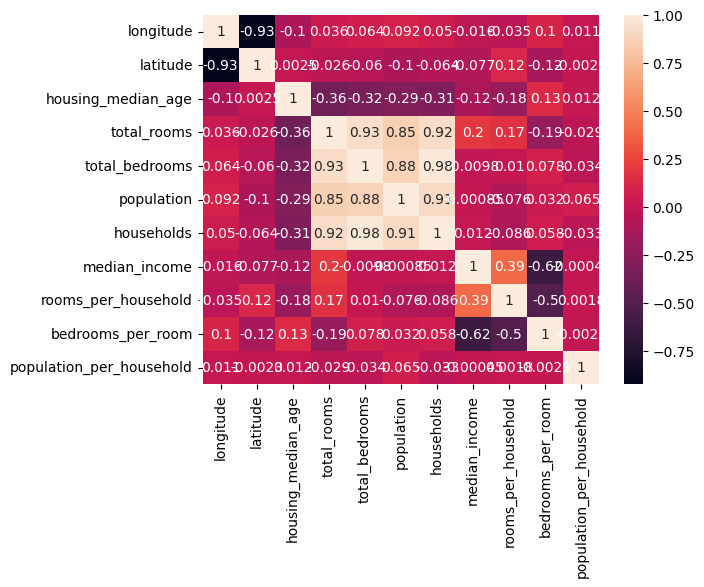

In [41]:
corrMatrix = df_train.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Question 3

* Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
* What is the value of mutual information?
* Round it to 2 decimal digits using `round(score, 2)`

Options:
- 0.26
- 0
- 0.10 ✅
- 0.16

In [42]:
# Mutual information score
mutual_info_score(df_full_train.ocean_proximity, df_full_train.median_house_value_binary)

0.10192246151183289

### Question 4

* Now let's train a logistic regression
* Remember that we have one categorical variable `ocean_proximity` in the data. Include it using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Options:
- 0.60
- 0.72
- 0.84 ✅
- 0.95

In [43]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Calculating accuracy over validation set
y_pred = model.predict_proba(X_val)[:, 1]
binary_decision = (y_pred >= 0.5)

accuracy = accuracy_score(y_val, binary_decision)
print(round(accuracy, 2))

0.84


### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 
* Which of following feature has the smallest difference? 
   * `total_rooms`
   * `total_bedrooms` 
   * `population`
   * `households` ✅

> **note**: the difference doesn't have to be positive

In [45]:
train_dict = df_train[['total_rooms', 'total_bedrooms', 'population', 'households']].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[['total_rooms', 'total_bedrooms', 'population', 'households']].to_dict(orient='records')
X_val = dv.transform(val_dict)

model_r = model.fit(X_train, y_train)

# Calculating accuracy over validation set
y_pred = model_r.predict_proba(X_val)[:, 1]
binary_decision = (y_pred >= 0.5)

accuracy_r = accuracy_score(y_val, binary_decision)
print(round(accuracy, 2))


0.84


Without total_rooms

In [46]:
train_dict = df_train[['total_bedrooms', 'population', 'households']].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[['total_bedrooms', 'population', 'households']].to_dict(orient='records')
X_val = dv.transform(val_dict)

model_1 = model.fit(X_train, y_train)

# Calculating accuracy over validation set
y_pred = model_1.predict_proba(X_val)[:, 1]
binary_decision = (y_pred >= 0.5)

accuracy1 = accuracy_score(y_val, binary_decision)
print(accuracy_r - accuracy1)

0.08187984496124034


Without total_bedrooms

In [47]:
train_dict = df_train[['total_rooms', 'population', 'households']].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[['total_rooms', 'population', 'households']].to_dict(orient='records')
X_val = dv.transform(val_dict)

model_2 = model.fit(X_train, y_train)

# Calculating accuracy over validation set
y_pred = model_2.predict_proba(X_val)[:, 1]
binary_decision = (y_pred >= 0.5)

accuracy2 = accuracy_score(y_val, binary_decision)
print(accuracy_r - accuracy2)

0.04869186046511631


Without population

In [48]:
train_dict = df_train[['total_rooms', 'total_bedrooms', 'households']].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[['total_rooms', 'total_bedrooms', 'households']].to_dict(orient='records')
X_val = dv.transform(val_dict)

model_3 = model.fit(X_train, y_train)

# Calculating accuracy over validation set
y_pred = model_3.predict_proba(X_val)[:, 1]
binary_decision = (y_pred >= 0.5)

accuracy3 = accuracy_score(y_val, binary_decision)
print(accuracy_r - accuracy3)

0.05281007751937983


Without households

In [49]:
train_dict = df_train[['total_rooms', 'total_bedrooms', 'population']].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[['total_rooms', 'total_bedrooms', 'population']].to_dict(orient='records')
X_val = dv.transform(val_dict)

model_4 = model.fit(X_train, y_train)

# Calculating accuracy over validation set
y_pred = model_4.predict_proba(X_val)[:, 1]
binary_decision = (y_pred >= 0.5)

accuracy4 = accuracy_score(y_val, binary_decision)
print(accuracy_r - accuracy4)

0.03754844961240311


### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column `'median_house_value'`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model (`model = Ridge(alpha=a, solver="sag", random_state=42)`) on the training data.
* This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest `alpha`.

Options:
- 0 ✅
- 0.01
- 0.1
- 1
- 10 


In [54]:
def calc_rmse(y_test, y_pred):
    error = y_pred - y_test
    mse = (error ** 2).mean()
    rmse =np.sqrt(mse)
    return rmse

Data preparation for Linear regression

In [56]:
# Data preparation
log_target = np.log1p(target)
log_target.head()

features = df.drop(columns = ["median_house_value", "median_house_value_binary"])
features.head()

df_full_train, df_test, y_full_train, y_test = train_test_split(features, log_target, test_size=0.2, random_state=42)
df_train, df_val, y_train, y_val = train_test_split(df_full_train, y_full_train, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val =df_val.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)


One Hot Encoding

In [60]:
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

Ridge Regression

In [61]:
from sklearn.linear_model import Ridge

alpha_values = [0, 0.01, 0.1, 1, 10]
rmse_list = []

for alpha in alpha_values:
    model = Ridge(alpha=alpha, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    rmse = calc_rmse(y_val, y_pred)
    print(f"Alpha: {alpha}, RMSE: {rmse}")
    rmse_list.append(rmse)
print(min(rmse_list))

Alpha: 0, RMSE: 0.5240635707015139
Alpha: 0.01, RMSE: 0.524063570718629
Alpha: 0.1, RMSE: 0.5240635708812071
Alpha: 1, RMSE: 0.5240635725155536
Alpha: 10, RMSE: 0.5240635888333284
0.5240635707015139
